# *bnsobol*: Example Use

To illustrate *bnsobol*'s functionality, we will study a Bayesian network that models concrete resistance as a function of 23 nodes [1]. As model inputs we consider variables $E_1, \dots, E_{15}$. The output, variable $O$, can take values $\{0, 1, 2\}$ corresponding to *low*, *medium* and *high* strength for the resulting concrete, respectively.

[1] E. Castillo, U. Kjaerulff: ["Sensitivity analysis in Gaussian Bayesian networks using a symbolic-numerical technique"](https://www.sciencedirect.com/science/article/abs/pii/S0951832002002259). *Reliability Engineering & System Safety*, 2003.

Let us start by importing the necessary packages and reading the network:

In [1]:
import bnsobol as bn
import pgmpy.readwrite

b = pgmpy.readwrite.BIFReader("concrete.bif").get_model()

Next, let us encode the input variable names, the output $O$, and the values in $\mathbb{R}$ that $O$ can take:

In [2]:
inputs = ['E{}'.format(i) for i in range(1, 16)]
output = 'O'
values = [0, 1, 2]

As a preprocessing step, we also need to transform the input Bayesian network into a Markov random field (MRF) that encodes the output variable's domain:

In [3]:
m = bn.util.to_mrf(b, output=output, values=values)

We are now ready to compute Sobol sensitivity indices. For example, let us use the *total indices* to answer this question: what variable has a clearer effect on the concrete strength, the air's pH value ($E_6$) or its humidity ($E_7$)?

In [4]:
print(bn.indices.total_index(m, b, inputs=inputs, i='E6'))
print(bn.indices.total_index(m, b, inputs=inputs, i='E7'))

0.07964388863195926
0.025356869386768177


From these results, it is clear that the pH exerts a stronger effect.

Last, we will calculate the total indices for all inputs and visualize them on top of the original network using *bnsobol*'s helper function `plot_graph`:

/home/rballester/miniconda3/envs/learning/lib/python3.6/site-packages/matplotlib/colors.py:235: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)
/home/rballester/miniconda3/envs/learning/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


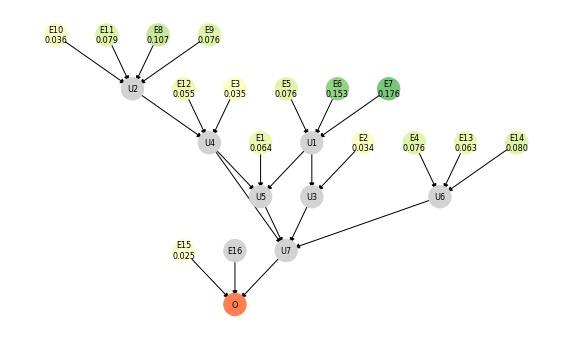

In [5]:
indices = [bn.indices.total_index(m, b, inputs=inputs, i=i) for i in inputs]
bn.viz.plot_graph(b, inputs=inputs, indices=indices, output=output)